<center>
    <h1> Reconocimiento de patrones y aprendizaje automático</h1>
    <h1>Tarea 3: Redes neuronales y árboles de decisión</h1>
    <h2>González Alvarado Raúl : 313245312</h2>
</center>

## 1. Investigación

Realiza un breve resumen donde contestes las siguientes preguntas:
- ¿Qué son las redes neuronales recurrentes (RNN's)?
- Describe los diferentes tipos de RNN's
- ¿Qué tipo de problemas se pueden resolver a través de RNN's?
- ¿Qué son las redes de tipo _Long Short-Term Memory_ (LSTM)?
- Describe la arquitectura principal de una red LSTM
- ¿Cuál es la ventaja de usar LSTM en la predicción de series de tiempo sobre otros tipos de redes neuronales?

### 1.1 Resumen

Una red neuronal recurrente (RNN o _recurrent neural network_), es una red neuronal muy parecida a la que vimos en clase, en la cuál la información fluye desde la capa de entrada 
hasta la capa de salida (_feedforward neural network_), pero su principal diferencia es que 
las neuronas intermedias también pueden devolver la información a neuronas por las que ya 
había pasado la información, creando ciclos dentro de la red, e incluso conectando 
neuronas consigo mismas y haciendo que el resultado del paso anterior sea usado como input
en el paso siguiente.

Las principales fortalezas de estas redes está en los ciclos creados por sus conexiones
ya que le permite "recordar" información pasada perteneciente a la secuencia que está
procesando. Esto le permite predecir a partír de secuencias arbitrarias de datos, 
tales como enunciados, grabaciones de audio o series de tiempo, y procesamiento de 
lenguaje natural.

Estas redes neuronales se clasifican por tipos según el tamaño de entrada y el tamaño de 
salida:

- Vector To Sequence: tienen una sola entrada que se pone repetidas veces, pero una 
sola secuencia como salida.
Como ejemplo tenemos la generación de subtítulos (esta es la secuencia) a partír
de una imágen (este sería el vector).
- Sequence To Vector: tienen una secuencia de entrada y una sola salida. 
Un ejemplo de esto es el análisis de sentimiento (tiene como entrada una secuencia 
de texto y como salida un score de sentimiento).
- Sequence To Sequence: tienen una secuencia de entrada y una secuencia de salida. 
- Encoder-Decoder: Es una composición de una Sequence To Vector cuya salida es la
entrada de un Vector To Sequence. Un ejemplo puede ser en traducción entre idiomas.

Otra diferencia de las RNN con los MLP es el algoritmo usado para su entrenamiento, 
es similar al algoritmo de backpropagation, pero toma en cuenta el tiempo "desenrollando"
(unrolling) la red neuronal y usando el algoritmo usual de backpropagation. 
Ya que ahora se toma en cuenta el orden de los datos, es importante resaltar que cada
que se procesa un dato nuevo vamos a decir que se dio un "paso" en el tiempo.

El problema con estas redes es que al ser tan grandes el gradiente da pasos muy grandes
o muy pequeños. Además si se le pasa secuencias muy largas surge el problema en que 
la red "olvida" los datos del principio en la secuencia, una forma de resolver este 
problema es con las _Long Short-Term Memory cell_ (LSTM).
 
Las RNN que hacen uso de las LSTM cell's se les llama _redes LSTM_.
Diremos que una LSTM cell es una red de 4 capas densas conectadas a "compuertas", 
y su "estado" será la salida con la que se volverá a alimentar la celda en el siguiente 
paso (**no** confundir con la salida $y_t$ con la cual se alimenta las siguientes capas).
El estado de la celda está dividido en dos $h_t$ y $c_t$, que serán el estado a corto
plazo y el estado a largo plazo respectivamente.

![lstm-cell](./lstm-cell.png)

El objetivo de esta celda es decidir qué información de largo plazo olvida de $c_{t-1}$
usando la compuerta de olvido (_forget gate_) junto con la salida de la capa densa $f_t$;
luego decide qué información nueva le añade usando las salidas de $g_t, i_t$, de este
modo actualiza la memoria a largo plazo $c_t$; y finalmente cómo la información de 
largo plazo junto con la salida de $o_t$ (y pasando por la compuerta de salida _output gate_)
influye en la nueva información de corto plazo $h_t$.

El trabajo de la capa $g_t$ es el de procesar la entrada $x_t$ junto con la $h_{t-1}$ tal
y como lo hace una capa de una RNN convencional.
Las otras capas $f_t, i_t, o_t$, son las encargadas de controlar cada una de las compuertas,
deciden que tanto se activa gracias a que tienen como función de activación a $tanh$ (que
da valores entre 0 y 1):
- _forget gate_: controla qué información de la memoria de largo plazo se olvida
- _input gate_: controla qué información de $g_t$ se añade a la memoria de largo plazo
- _output gate_: controla qué información de largo plazo influye en la memoria de corto plazo.

<br/>
<br/>

Fuente: Aurelien Geron - Hands-on Machine Learning with Scikit-Learn, Keras, 
and TensorFlow - O'reilly (2019). Chapter 15. Processing Sequences Using RNNs and CNNs

## 2. Implementación de redes neuronales

El objetivo de este ejercicio es construir una red neuronal para clasificar 
el tipo de actividad que realiza una persona, usando como entrada los datos 
de un acelerómetro, que se encuentran en el archivo `dataset2.zip`.

Los datos fueron recolectados de un acelerómetro puesto en el pecho de 15 
participantes que realizan siete actividades. Los datos están separados 
por participante, por lo que hay 15 diferentes archivos, uno por cada 
participante con sus diferentes actividades.

Estos datos fueron grabados con una frecuencia de 52 hz en tres direcciones 
$x,y,z$, por lo que cada segundo de registro del acelerómetro contiene 52 
datos en tres dimensiones de la actividad que la persona está realizando.

Cada columna es un atributo de la medición que representa:
- Número serial o identificador
- Aceleración $x$
- Aceleración $y$
- Aceleración $z$
- Actividad

La actividad está codificada por un número del 1-7:
1. Trabajo en computadora
2. Pararse, caminar y subir/bajar escaleras
3. Mantenerse en pie
4. Caminar
5. Subir/bajar escaleras
6. Caminar y hablar con alguien
7. Hablar estando de pie

### 2.1 Ejercicios

**1.** Crea una red neuronal capaz de realizar la clasificación de la actividad. 
Recuerda dividir los datos en subconjuntos de entrenamiento y prueba.

**2.** Determina el número óptimo de capas y neuronas por capa para este problema. 
Reporta tus resultados.

**3.** Prueba con diferentes funciones de activación: paso, sigmoide, tangente 
hiperbólica y relu. Reporta tus resultados

**4.** Elabora un reporte en el que se indique:
- El preprocesamiento efectuado sobre los datos.
- El número de elementos utilizados como conjunto de entrenamiento y prueba.
- Matriz de confusión e interpretación.
- Reporta el valor de las métricas precisión, exhaustividad (recall), 
exactitud (accuracy) y valor F1 (F1-Score) de este clasificador.
- ¿Cómo utilizarías funciones de activación continuas (como la sigmoide) 
para calibrar el rendimiento de la red neuronal?

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_path = "./data/activity-recognition-from-single-chest-mounted-accelerometer"
files = [f"{data_path}/{i}.csv" for i in range(1,16)]
attrib_names = ["x", "y", "z"]
label_name = "actividad"
colnames = ["id"] + attrib_names + [label_name]
dfs = [pd.read_csv(file, names=colnames, dtype=int) for file in files]

Actividad 1
Tamaño del dataset: 32750


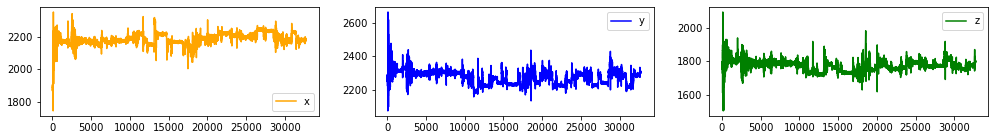

Tamaño del dataset: 31540


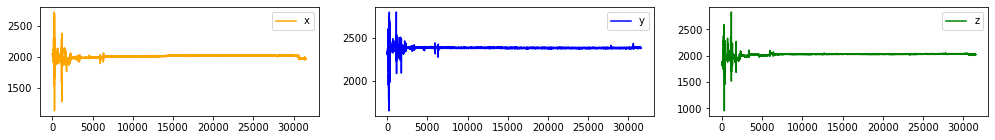

Tamaño del dataset: 44150


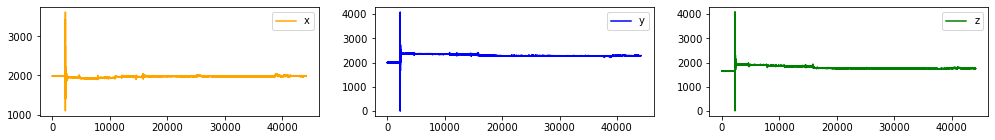

Actividad 2
Tamaño del dataset: 3600


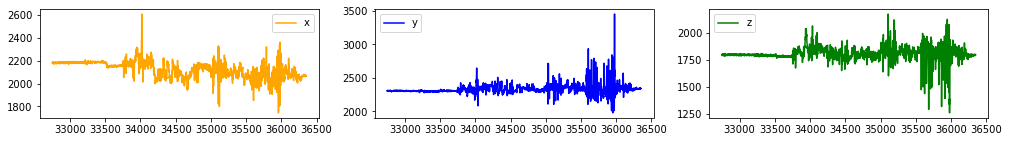

Tamaño del dataset: 1650


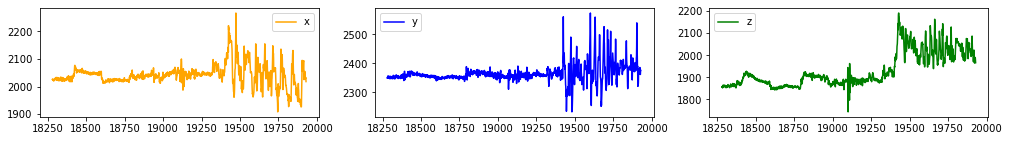

Tamaño del dataset: 4680


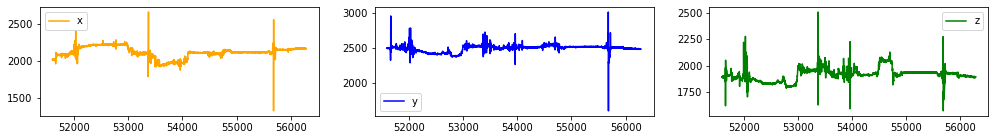

Actividad 3
Tamaño del dataset: 13420


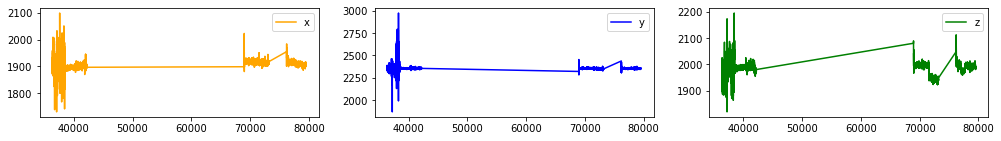

Tamaño del dataset: 11330


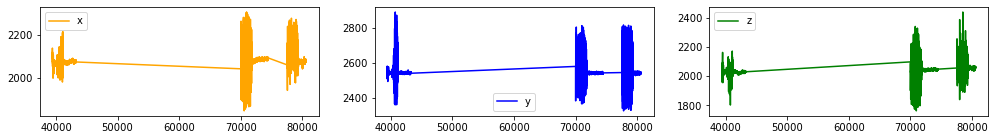

Tamaño del dataset: 10519


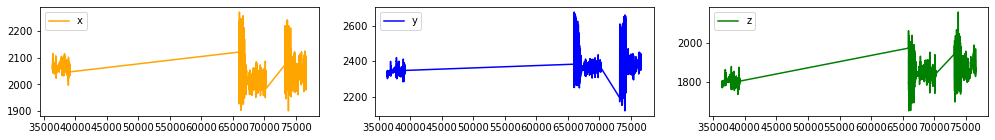

Actividad 4
Tamaño del dataset: 26860


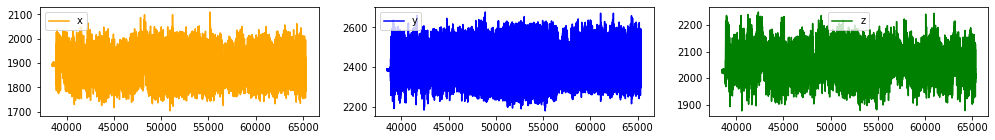

Tamaño del dataset: 17650


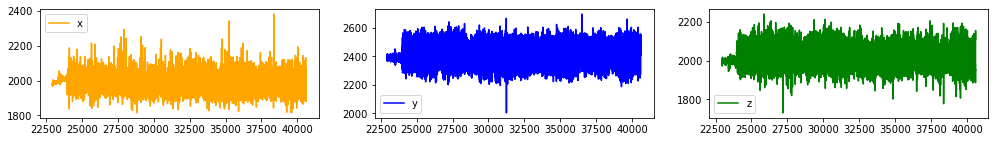

Tamaño del dataset: 23300


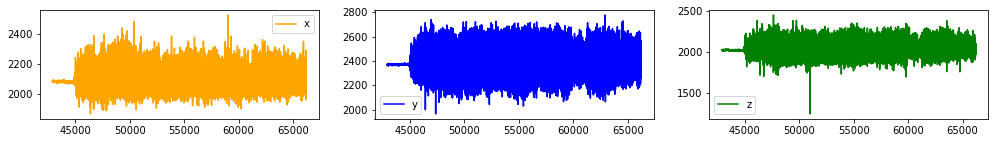

Actividad 5
Tamaño del dataset: 3935


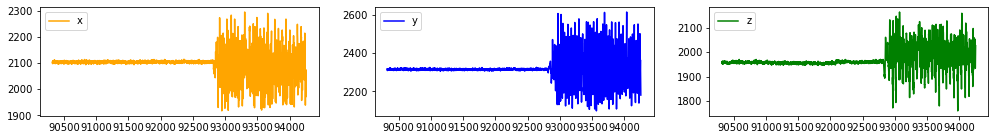

Tamaño del dataset: 3745


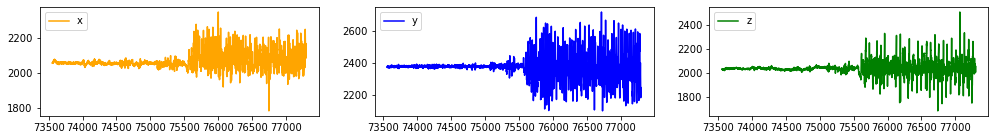

Tamaño del dataset: 3620


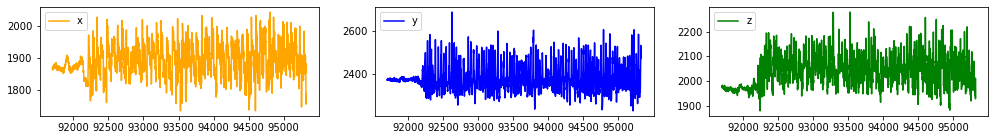

Actividad 6
Tamaño del dataset: 1400


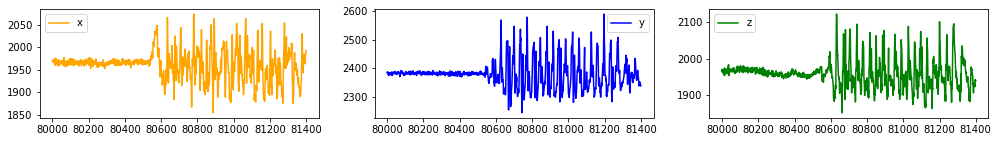

Tamaño del dataset: 5980


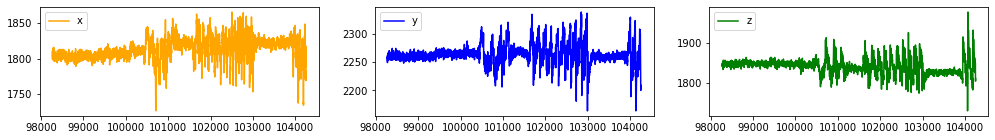

Tamaño del dataset: 1200


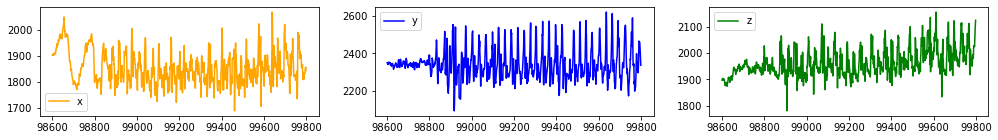

Actividad 7
Tamaño del dataset: 35490


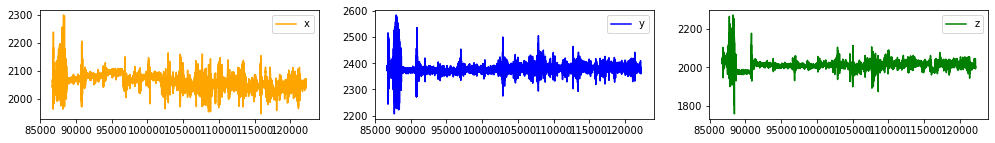

Tamaño del dataset: 33431


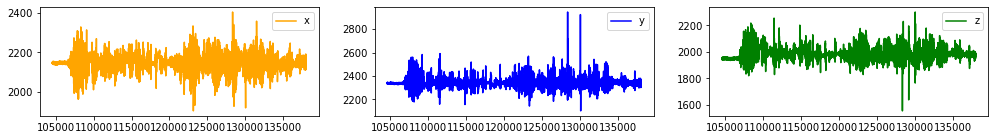

Tamaño del dataset: 15500


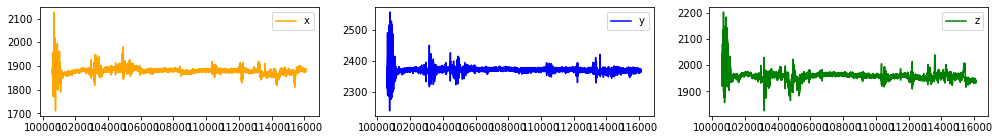

In [3]:
import matplotlib.pyplot as plt
import random

# Cantidad de participantes aleatorios a mostrar
sample_size = 3

colors = {"x": "orange", "y": "blue", "z": "green"}
for i in range(1,8):
    print(f"Actividad {i}")
    for person in random.sample(range(15), sample_size):
        groups = dfs[person].groupby(label_name)
        g = groups.get_group(i)
        plt.figure(figsize=(17,2))
        print(f"Tamaño del dataset: {g.shape[0]}")
        for idx, coord in enumerate(attrib_names):
            plt.subplot(1,3,idx+1)
            plt.plot(g[coord], color=colors[coord], label=coord)
            plt.legend()
        plt.show()

In [4]:
def sliding_windows(df, window_size, overlap):
    windows = np.array([], dtype="int64")
    labels = np.array([], dtype="int64")
    step_size = int(window_size * (1-overlap))
    groups = df.groupby(label_name)
    for label in range(1,8):
        group = groups.get_group(label)
        
        if label in [2,5,6]:
            step_size = int(window_size * 0.1)
        else:
            step_size = int(window_size * overlap)
            
        for idx in range(0, group.shape[0], step_size):
            new_window = group[attrib_names].iloc[idx:idx+window_size]
            new_window = new_window.to_numpy()
            if new_window.shape[0] < window_size:
                break
            if windows.size == 0:
                windows = np.array([new_window])
            else:
                windows = np.concatenate((windows, [new_window]))
            labels = np.append(labels, label)
    return windows, labels

In [5]:
seconds = 30
window_size = 52 * seconds
overlap = 0.5

X = list()
y = list()
for persona in range(15):
    windows, labels = sliding_windows(dfs[persona], window_size, overlap)
    X.append(windows)
    y.append(labels)
X = np.concatenate(X)
y = np.concatenate(y)

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1997)
d1, d2, d3 = X.shape
X_new_shape = (-1, d2*d3)
for train_idx, test_idx in stratSplit.split(X, y):
    X_train, y_train = X[train_idx].reshape(X_new_shape), y[train_idx].reshape((-1,1))
    X_test, y_test = X[test_idx].reshape(X_new_shape), y[test_idx].reshape((-1,1))

In [7]:
test = pd.DataFrame(X_test)
test["label"] = y[test_idx]
print("Instancias por clase en test_set")
print(test["label"].value_counts().sort_index())
print("Porcentaje de cada clase")
print(test["label"].value_counts().sort_index() / test.shape[0])

Instancias por clase en test_set
1    152
2     37
3     52
4     87
5     38
6     34
7    148
Name: label, dtype: int64
Porcentaje de cada clase
1    0.277372
2    0.067518
3    0.094891
4    0.158759
5    0.069343
6    0.062044
7    0.270073
Name: label, dtype: float64


In [8]:
from sklearn.preprocessing import OneHotEncoder

y_train = OneHotEncoder(sparse=False).fit_transform(y_train)

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [10]:
layers = list()
layers.append(int(np.sqrt(X_train.shape[1] * 7)))
layers.append(layers[-1] // 2)
layers.append(layers[-1] // 2)
layers

[180, 90, 45]

In [11]:
from tensorflow import keras

def get_mlp():
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(layers[0], activation="relu", input_shape=(X_train.shape[1],)))
    model.add(keras.layers.Dense(layers[1], activation="relu"))
    model.add(keras.layers.Dense(layers[2], activation="relu"))
    model.add(keras.layers.Dense(7, activation="softmax"))
    model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=["accuracy"])
    return model

2022-01-24 22:56:49.452003: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-24 22:56:49.452034: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [12]:
mlp_model = get_mlp()
mlp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 180)               842580    
                                                                 
 dense_1 (Dense)             (None, 90)                16290     
                                                                 
 dense_2 (Dense)             (None, 45)                4095      
                                                                 
 dense_3 (Dense)             (None, 7)                 322       
                                                                 
Total params: 863,287
Trainable params: 863,287
Non-trainable params: 0
_________________________________________________________________


2022-01-24 22:56:51.331124: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-01-24 22:56:51.331176: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-24 22:56:51.331200: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (thinkpad-endevouros): /proc/driver/nvidia/version does not exist
2022-01-24 22:56:51.331451: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
history_mlp = mlp_model.fit(X_train, y_train, epochs=300, validation_split=0.1)

Epoch 1/300
62/62 [==============================] - 1s 14ms/step - loss: 1.8917 - accuracy: 0.2387 - val_loss: 1.8149 - val_accuracy: 0.2374
Epoch 2/300
62/62 [==============================] - 1s 10ms/step - loss: 1.8189 - accuracy: 0.2646 - val_loss: 1.8181 - val_accuracy: 0.2374
Epoch 3/300
62/62 [==============================] - 1s 11ms/step - loss: 1.7556 - accuracy: 0.2961 - val_loss: 1.7650 - val_accuracy: 0.2374
Epoch 4/300
62/62 [==============================] - 1s 13ms/step - loss: 1.7225 - accuracy: 0.3144 - val_loss: 1.7235 - val_accuracy: 0.2922
Epoch 5/300
62/62 [==============================] - 1s 11ms/step - loss: 1.6858 - accuracy: 0.3499 - val_loss: 1.6867 - val_accuracy: 0.2922
Epoch 6/300
62/62 [==============================] - 1s 12ms/step - loss: 1.6901 - accuracy: 0.3382 - val_loss: 1.7288 - val_accuracy: 0.3014
Epoch 7/300
62/62 [==============================] - 1s 12ms/step - loss: 1.6643 - accuracy: 0.3509 - val_loss: 1.6785 - val_accuracy: 0.3014
Epoch 

In [14]:
def plot_history(history):
    plt.figure(figsize=(20, 4))

    plt.subplot(1,2,1)
    plt.plot(history.history["loss"], label="train set")
    plt.plot(history.history["val_loss"], label="validation set")
    plt.title("Loss")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history["accuracy"], label="train set")
    plt.plot(history.history["val_accuracy"], label="validation set")
    plt.title("Accuracy")
    plt.legend()
    plt.show()

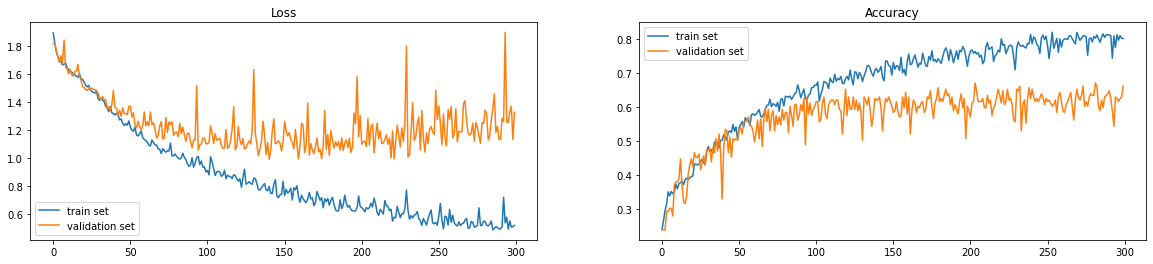

In [15]:
plot_history(history_mlp)

In [16]:
def predict_model(model, X_test):
    y_pred_score = model.predict(X_test)
    y_pred = np.argmax(np.round(y_pred_score), axis=1) + 1
    return y_pred

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report


def get_metrics(y_real, y_pred):
    ConfusionMatrixDisplay.from_predictions(y_real, y_pred,
                                            display_labels=range(1,8), 
                                            normalize="true")
    print("Precision: \t %f" % precision_score(y_real, y_pred, average="weighted"))
    print("Recall: \t %f" % recall_score(y_real, y_pred, average="weighted"))
    print("F1-Score: \t %f" % f1_score(y_real, y_pred, average="weighted"))
    print(classification_report(y_real, y_pred))

Precision: 	 0.630815
Recall: 	 0.633212
F1-Score: 	 0.599797
              precision    recall  f1-score   support

           1       0.58      0.88      0.70       152
           2       0.56      0.38      0.45        37
           3       0.52      0.29      0.37        52
           4       0.68      0.39      0.50        87
           5       0.57      0.11      0.18        38
           6       0.69      0.59      0.63        34
           7       0.72      0.85      0.78       148

    accuracy                           0.63       548
   macro avg       0.62      0.50      0.52       548
weighted avg       0.63      0.63      0.60       548



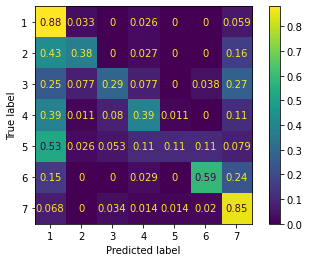

In [20]:
get_metrics(y_test[:,0], predict_model(mlp_model, scaler.transform(X_test)))

### 2.2 Reporte

En cuánto al **preprocesamiento** de los datos se hizo lo siguiente: al importar el orden de los datos 
respecto a cada participante, primero se procesó individualmente cada archivo para extraer los datos 
correspondientes a cada una de las actividades que hizo cada participante.
De cada una de las actividades se crearon ventanas de tiempo de tamaño $52*30$ (el 30 representa los segundos
que está tomando en cuenta la ventana), es decir que cada dato nuevo son los datos recopilados en 30 segundos.
También se utilizó un overlap del 50% entre cada ventana (en el caso de las clases 2,5,6 se utilizó un overlap del
90% para balancear los datos). Este mismo procedimiento se realizó para cada uno de los archivos de cada participante para luego juntarlos todos en un solo dataset. También se usó un `MinMaxScaler` para que la
red pueda ajustar bien los pesos; el ajuste del escalamiento se hizo sobre el conjunto de entrenamiento.

La **división de entrenamiento/prueba** fue un split balanceado en cuanto a clases para que se conserve
la proporción, además se tomaron el 20% de los datos como prueba.

La **arquitectura de la red** es usando 3 capas densas con activación `relu` y una capa de salida con
activación `softmax`, esta configuración logró el mejor resultado por mucho, ya que las otras funciones
de activación (`tanh` y `sigmoid`) no disminuían el accuracy.

Las **métricas de evaluación** y la **matríz de confunsión** (con los datos de prueba) no fueron muy
buenos en las clases que tenían menos datos, pero se logró un resultado aceptable en las clases 1 y 7.
El accuracy total del sistema fue de 0.6, principalmete afectado por las clases con menos datos.

Se podría hacer una **calibración** haciendo un clasificador para cada clase que distinga esa clase de las
otras. Luego con ese clasificador usar las salidas (entre 0 y 1) de las funciones continuas para ajustar la
taza de falsos positivos y la taza de verdaderos positivos, luego usar los clasificadores en conjunto para 
obtener una predicción.

## 3. Árboles de decisión

El archivo `creditcard.csv` contiene las transacciones realizadas con tarjeta de crédito durante
dos dı́as en noviembre de 2013. Algunas de estas transacciones fueron fraudes bancarios (Class=1).
Por motivos de confidencialidad, cada registro contiene valores numéricos de las 28 componentes
resultantes de un procesamiento por PCA (V1 ... V28). Además, se presenta el tiempo en segundos
entre la transacción actual y la primer transacción (Time).

El conjunto de datos está altamente desbalanceado, contiene 492 fraudes (Class=1) y 284,315
transacciones legı́timas (Class=0). Tu objetivo será construir un sistema de clasificación basado
en árboles de decisión para detectar transacciones con alta probabilidad de fraude.

Los detalles de este conjunto de datos pueden ser encontrados en [kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud).

### 3.1 Ejercicios

**1.** Describe la diferencia entre un árbol de decisión y un bosque aleatorio.

**2.** Describe qué es el _GINI Index_ y cómo se utiliza en árboles de decisión.

**3.** Describe brevemente al menos dos técnicas para evitar sobre entrenamiento en árboles de
decisión.

**4.** Separa el conjunto en datos de prueba (30 %) y datos de entrenamiento (70 %) utilizando el
algoritmo de muestreo de tu preferencia.

**5.** Entrena un árbol de decisión con el conjunto de entrenamiento y reporta la precisión obtenida
en ambos conjuntos.

**6.** Suponiendo que en el conjunto de entrenamiento $E$ existen $T$ datos totales, construye 
$N = T/F$ subconjuntos de entrenamiento balanceados $E_1, ..., E_N$ , en dónde $F$ es el número de
fraudes en el conjunto de entrenamiento. Cada subconjunto $E_i$ esta formado con los siguientes
componentes:
- Los $F$ registros de fraudes en $E$
- $F$ registros legı́timos en $E$ de forma que los registros legı́timos de $E_i$ sean distintos de
los registros de $E_j$ para todos $i, j$.

En términos simples, construimos diversos subconjuntos de entrenamiento completamente
balanceados. Cada uno de ellos contiene todos los registros de fraudes y un subconjunto de
los registros legı́timos.

**7.** Entrena un árbol de decisión para cada subconjunto balanceado de entrenamiento

**8.** Para cada registro en el conjunto de prueba, todos los árboles asignarán una clasificación a
la transacción, basados en el aprendizaje de su conjunto de prueba particular. De esta forma,
cada árbol "votará" la clasificación del registro en cuestión. La clase asignada al registro será
entonces la más votada por el conjunto de árboles.

**9.** Utiliza el sistema de árboles votantes para clasificar los datos en el conjunto de prueba.
Reporta la precisión de este sistema en ambos conjuntos. Compara los resultados con el
árbol entrenado con el conjunto desbalanceado de entrenamiento.

**10.** Suponiendo que los casos positivos son los fraudes, ¿cómo utilizarı́as una curva ROC para
controlar el compromiso entre falsos positivos y verdaderos positivos?

**11.** ¿Qué es más importante en la calibración de esta curva ROC, maximizar la tasa de verdaderos
positivos o minimizar la tasa de falsos positivos?

**12.** ¿Cómo manejarı́as un conjunto de datos desbalanceado con más de dos clases para utilizarlo
en árboles de decisión?

In [105]:
cc_data = pd.read_csv("./data/credit-card-fraud/creditcard.csv")
cc_data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [106]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [107]:
cc_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<AxesSubplot:>

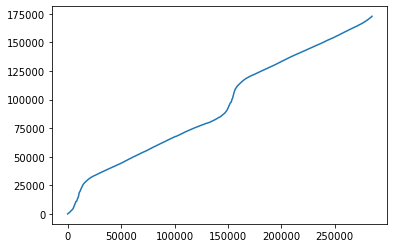

In [108]:
cc_data["Time"].plot()

In [109]:
stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=1997)
for train_idx, test_idx in stratSplit.split(cc_data, cc_data["Class"]):
    train_set = cc_data.iloc[train_idx]
    test_set = cc_data.iloc[test_idx]

In [110]:
print("Balanceo de clases")
for s, s_name in [(data, "full"), (train_set,"train"), (test_set, "test")]:
    print("\n", s_name)
    print(s["Class"].value_counts() / s.shape[0])

Balanceo de clases

 full
0    0.998273
1    0.001727
Name: Class, dtype: float64

 train
0    0.998275
1    0.001725
Name: Class, dtype: float64

 test
0    0.998268
1    0.001732
Name: Class, dtype: float64


In [111]:
X_train = train_set.drop("Class", axis=1)
y_train = train_set["Class"]
X_test = test_set.drop("Class", axis=1)
y_test = test_set["Class"]

In [112]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [113]:
def credit_card_metrics(y_real, y_pred):
    ConfusionMatrixDisplay.from_predictions(y_real, y_pred,
                                                display_labels=["Legítimo", "Fraude"], 
                                                normalize="true")
    print("Precision: \t %f" % precision_score(y_real, y_pred))
    print("Recall: \t %f" % recall_score(y_real, y_pred))
    print("F1-Score: \t %f" % f1_score(y_real, y_pred))
    print(classification_report(y_real, y_pred))

Test set
Precision: 	 0.728395
Recall: 	 0.797297
F1-Score: 	 0.761290
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.73      0.80      0.76       148

    accuracy                           1.00     85443
   macro avg       0.86      0.90      0.88     85443
weighted avg       1.00      1.00      1.00     85443



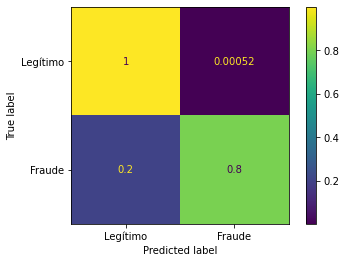

In [119]:
print("Test set")
y_pred = tree_model.predict(X_test)
credit_card_metrics(y_test, y_pred)

Train set
Precision: 	 1.000000
Recall: 	 1.000000
F1-Score: 	 1.000000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00       344

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364



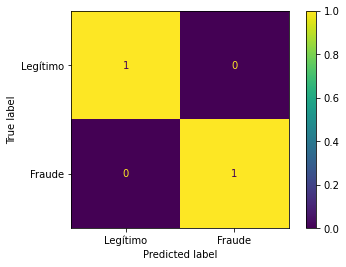

In [120]:
print("Train set")
y_pred = tree_model.predict(X_train)
credit_card_metrics(y_train, y_pred)

In [121]:
F = train_set["Class"].value_counts()[1]
T = train_set.shape[0]
N = T // F
F, T, N

(344, 199364, 579)

In [122]:
groups = train_set.groupby("Class")
legitimos = groups.get_group(0)
fraudes = groups.get_group(1)

In [123]:
permuted_indices = np.random.permutation(legitimos.shape[0])
train_sets = list()
for idx in range(N):
    Ei = legitimos.iloc[permuted_indices[i::N]]
    Ei = pd.concat([Ei, fraudes])
    train_sets.append(Ei)

In [124]:
for s in random.sample(train_sets, k=5):
    print(s["Class"].value_counts())

0    344
1    344
Name: Class, dtype: int64
0    344
1    344
Name: Class, dtype: int64
0    344
1    344
Name: Class, dtype: int64
0    344
1    344
Name: Class, dtype: int64
0    344
1    344
Name: Class, dtype: int64


In [125]:
trees = list()
for train_set in train_sets:
    X_train_local = train_set.drop("Class", axis=1)
    y_train_local = train_set["Class"]
    tree_model = DecisionTreeClassifier(max_depth=2)
    tree_model.fit(X_train_local, y_train_local)
    trees.append(tree_model)

In [126]:
def forest_predict(trees, X):
    predicts = list()
    for tree in trees:
        predicts.append(tree.predict(X))
    predicts = np.array(predicts).T    
    final_predicts = list()
    for row in predicts:
        final_predicts.append(np.bincount(row).argmax())
    return np.array(final_predicts)

Test set
Precision: 	 0.018578
Recall: 	 0.932432
F1-Score: 	 0.036431
              precision    recall  f1-score   support

           0       1.00      0.91      0.96     85295
           1       0.02      0.93      0.04       148

    accuracy                           0.91     85443
   macro avg       0.51      0.92      0.50     85443
weighted avg       1.00      0.91      0.95     85443



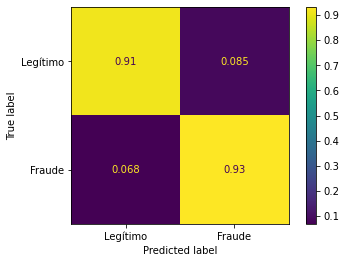

In [129]:
print("Test set")
y_pred = forest_predict(trees, X_test)
credit_card_metrics(y_test, y_pred)

Train set
Precision: 	 0.018412
Recall: 	 0.912791
F1-Score: 	 0.036096
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    199020
           1       0.02      0.91      0.04       344

    accuracy                           0.92    199364
   macro avg       0.51      0.91      0.50    199364
weighted avg       1.00      0.92      0.95    199364



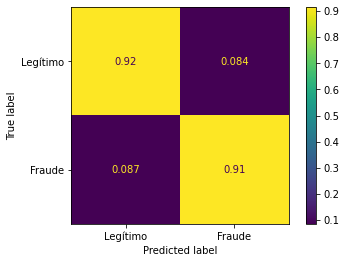

In [130]:
print("Train set")
y_pred = forest_predict(trees, X_train)
credit_card_metrics(y_train, y_pred)

### 3.2 Reporte

Un árbol de decisión **difiere** de un bosque aleatorio en que el árbol de decisión es un solo modelo mientras que el bosque aleatorio es un ensemble method. En específico es un conjunto de diferentes árboles de decisión , donde cada uno fue entrenado en un subconjunto de datos distintos y además son más regularizados (algunos llegando a tener un solo nivel de profundidad), el bosque aleatorio finalmente toma la decisión que haya tomado la mayoría (puede ser pesada) de los árboles de los que se compone.

Una de las principales desventajas de los árboles de decisión es el **sobreajuste de los datos**, para lidiar
con este problema se tiene que **regularizar** (como con los otros algoritmos de machine learning). 
Dos técnicas son:
- Max depth: que limita el número de niveles que puede tener el árbol, esto se logra deteniendo el crecimiento de una rama durante el algoritmo cuando se llega a la máxima profundidad.
- Min samples leaf: que limita el número mínimo de datos que debe haber en una hoja, es decir que aunque no sea un nodo puro pero ya tiene muy pocos datos entonces ya no continúa separando los datos (y creando más nodos), y convierte ese nodo en hoja.

El **_Gini Index_** es un índice de medición de "pureza" en un conjunto de datos, es decir qué tantos datos de una
sola clase están en un solo grupo. Se usa principalmente en árboles de decisión al momento de entrenarlos, ya que
su objetivo es reducir la "mezcla" de clases en los datos conforme se avanza por las ramas. Es muy similar a la entropía y su objetivo es el mismo, además de tener una "forma" muy similar: alcanzando su máximo valor en 0.5 y valiendo 0 en 0 y en 1.

---

En cuanto al **primer árbol de decición** entrenado, con los no fraudes está prediciendo casi todos los verdaderos positivos correctamente, pero para los fraudes está teniendo capturando solo el 75% de ellos, con una precisión del 73% y un recall del 75%, y aunque no es malo se esperaría algo mejor ya que los fraudes son los que le interesan más al banco.

Para el **segúndo método** (bosque aleatorio) se tiene ahora una mejor identificación de los fraudes pero a costa de fallar en algunas transacciones legítimas. cabe destacar que para lograr un mejor resultado en las transacciones legítimas, se regularizaron los árboles que conforman el bosque aleatorio: se crearon con la limitante de `max_depth=3`. Además no se tiene un alto sobreajuste en los datos de entrenamiento como sucedía en el árbol de decisión anterior.

Lo importante en la curva **ROC** sería maximizar los falsos positivos ya que un fraude haría perder dinero tanto a la persona afectada como al banco. Con lo cuál aumentar los verdaderos positivos en la curva ROC (moviendonos a la derecha) sería lo mejor aunque perdamos un poco de falsos positivos.

-----

Para ajustar un modelo con **múltiples clases desbalanceados** creo que sería bueno crear subconjuntos de los datos como lo hicimos en el bosque aleatorio, pero considerando como 1 si el dato está en la clase y 0 si no está en la clase. Esto se haría para cada clase, con lo que si se tiene en cuenta que hay $K$ clases, entonces se generarían $K$ modelos del tipo ensemble method y a su vez estos estarían agrupados formando otros modelo de ensemble. 